# Assignment 2

## Problem 1
Implement a Scaling function to linearly rescale (transform) the intensity values of the grayscale input
image to new intensity values. The Scaling function has two input parameters, inputIm and range, where
inputIm is the original grayscale image and range is a two-element vector containing the new minimum
and maximum intensity of the rescaled (transformed) image (e.g., scaledIm). The Scaling function has
two output parameters, where scaledIm is the transformed image and transFunc is the transform function,
which is a 256-element vector that stores the newly transformed intensity for each of the possible grayscale
intensities (i.e., the first and last elements of transFunc are the newly transformed values for intensity 0
and 255, respectively). Make sure that your function shows an appropriate error message if range contains
non-integer values, negative values, and a larger first element than the second element.
Note: Both input and output images of the Scaling function should be an array with the same size and the
same data type uint8.
Design four Scaling function calls to rescale the image foodIm to a new image scaledFoodIm. The first
three of these function calls will have three kinds of invalid data in range so appropriate error messages
will be displayed. The last function call will rescale the image foodIm to a new image scaledFoodIm
with an appropriate range [newMin newMax] so scaledFoodIm has a good quality. Plot transFunc in
Figure 1 with appropriate titles on both the x and y axes.

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

cwd = os.getcwd()

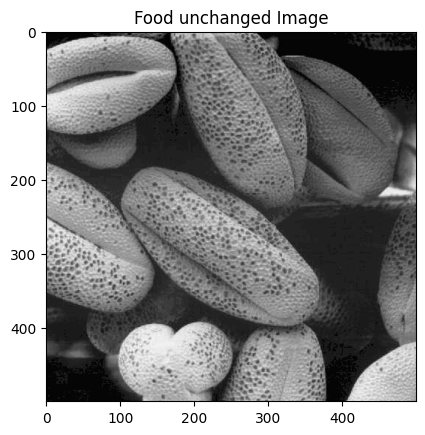

range[0] must be less than range[1]
range must be positive integers
range must be a list of two integers
minValueInInput:  90
maxValueInInput:  138


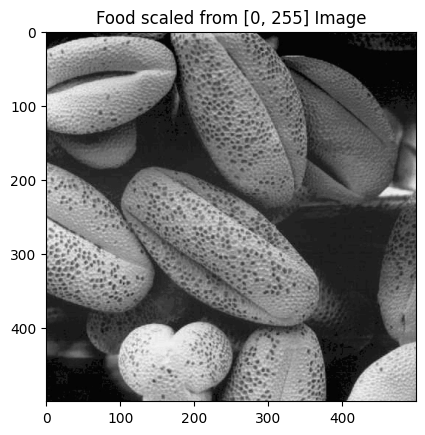

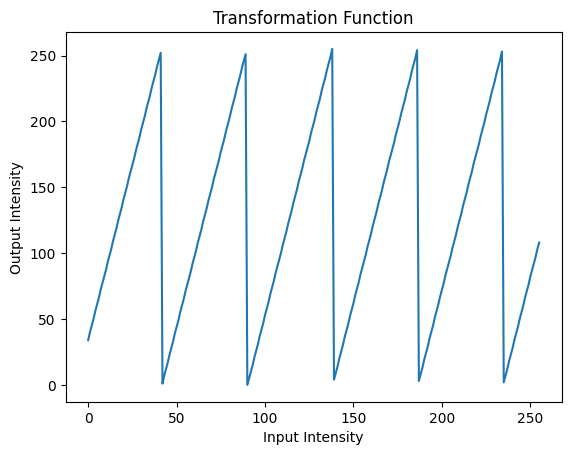

In [2]:
foodIm = cv2.imread(cwd + '/Food.jpg',cv2.IMREAD_GRAYSCALE)


plt.imshow(foodIm,cmap='gray')
plt.title('Food unchanged Image')
plt.show()

def linearScaling(inputIm, inputRange):
    if type(inputRange[0]) != int or type(inputRange[1]) != int:
        raise TypeError("range must be a list of two integers")
    if inputRange[0] > inputRange[1]:
        raise ValueError("range[0] must be less than range[1]")
    if inputRange[0] < 0 or inputRange[1] < 0:
        raise ValueError("range must be positive integers")

    minValueInInput = np.min(inputIm)
    maxValueInInput = np.max(inputIm)

    print("minValueInInput: ", minValueInInput)
    print("maxValueInInput: ", maxValueInInput)

    newMin = inputRange[0]
    newMax = inputRange[1]
    
    slope = (newMax - newMin) / (maxValueInInput - minValueInInput)
    shift_intensity = newMin - slope * minValueInInput

    transFunc = np.arange(256, dtype=np.uint8)
    transFunc = (transFunc * slope + shift_intensity).astype(np.uint8)

    scaledIm = np.zeros(inputIm.shape, dtype=np.uint8)

    for i in range(inputIm.shape[0]):
        for j in range(inputIm.shape[1]):
            originalIntensity = inputIm[i][j]
            newIntensity = transFunc[originalIntensity]
            scaledIm[i][j] = newIntensity

    return scaledIm, transFunc

    
try :
    scaleRange = [100, 0]
    scaledFoodImg, func = linearScaling(foodIm, scaleRange)
except ValueError as e:
    print(e)

try:
    scaleRange = [-1, 100]
    scaledFoodImg, func = linearScaling(foodIm, scaleRange)
except ValueError as e:
    print(e)

try:
    scaleRange = [0.5, 100.6]
    scaledFoodImg, func = linearScaling(foodIm, scaleRange)
except TypeError as e:
    print(e)

try:
    scaleRange = [0, 255]
    scaledFoodImg, func = linearScaling(foodIm, scaleRange)
except TypeError as e:
    print(e)

plt.imshow(scaledFoodImg,cmap='gray')
plt.title('Food scaled from [0, 255] Image')
plt.show()

plt.plot(func)
plt.title('Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.show()



# Problem 2

Implement a CalHist function to calculate either the histogram or the normalized histogram of the
grayscale input image.
Call the CalHist function to calculate the histogram of the image scaledFoodIm.
Call the CalHist function to calculate the normalized histogram of the image scaledFoodIm.
Display the histogram and the normalized histogram side-by-side in Figure 2 with appropriate titles on
both the x and y axes.

scaledFoodImg max intensity 255
normalizedScaledFoodImg max intensity 1.0
normalisedHist max intensity dict_keys([0.0196078431372549, 0.10196078431372549, 0.1450980392156863, 0.0, 0.08235294117647059, 0.12156862745098039, 0.058823529411764705, 0.22745098039215686, 0.24705882352941178, 0.2901960784313726, 0.27058823529411763, 0.30980392156862746, 0.3333333333333333, 0.35294117647058826, 0.41568627450980394, 0.4549019607843137, 0.4980392156862745, 0.47843137254901963, 0.43529411764705883, 0.39215686274509803, 0.16470588235294117, 0.5803921568627451, 0.6862745098039216, 0.7686274509803922, 0.788235294117647, 0.7254901960784313, 0.6666666666666666, 0.6039215686274509, 0.6431372549019608, 0.8117647058823529, 0.7490196078431373, 0.8313725490196079, 0.5176470588235295, 0.6235294117647059, 0.5607843137254902, 0.0392156862745098, 0.1843137254901961, 0.20784313725490197, 0.7058823529411765, 0.8509803921568627, 0.5411764705882353, 0.37254901960784315, 0.8941176470588236, 0.9137254901960784, 0.937

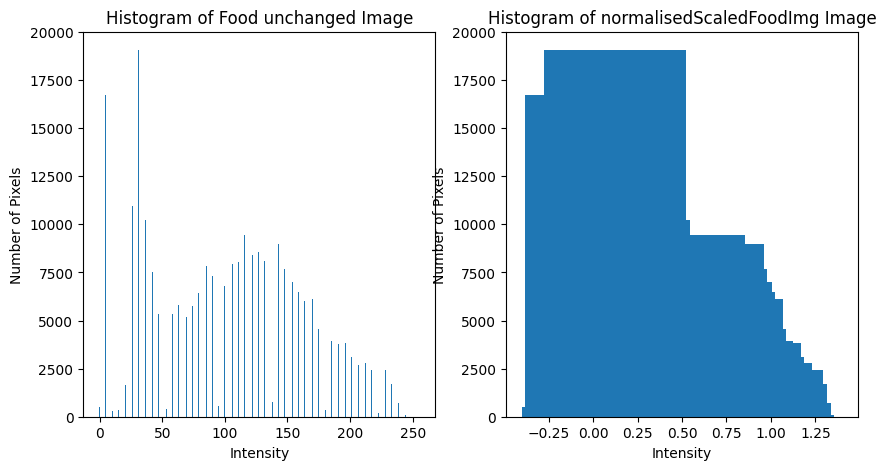

In [3]:
def CalHist(inputIm):
    hist = {}
    for i in range(inputIm.shape[0]):
        for j in range(inputIm.shape[1]):
            intensity = inputIm[i][j]
            if intensity in hist:
                hist[intensity] += 1
            else:
                hist[intensity] = 1
    return hist

hist = CalHist(scaledFoodImg)

print("scaledFoodImg max intensity" , np.max(scaledFoodImg))

normalizedScaledFoodImg = scaledFoodImg / 255

print("normalizedScaledFoodImg max intensity" , np.max(normalizedScaledFoodImg))

normalisedHist = CalHist(normalizedScaledFoodImg)

print("normalisedHist max intensity" , np.max(normalisedHist.keys()))

fig = plt.figure(figsize=(10, 5))
gs = GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax1.bar(hist.keys(), hist.values())
ax1.set_title('Histogram of Food unchanged Image')
ax1.set_xlabel('Intensity')
ax1.set_ylabel('Number of Pixels')

ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(normalisedHist.keys(), normalisedHist.values())
ax2.set_title('Histogram of normalisedScaledFoodImg Image')
ax2.set_xlabel('Intensity')
ax2.set_ylabel('Number of Pixels')
plt.show()



# Problem 3

Implement a HistEqualization function to perform histogram equalization on a grayscale input image to
achieve the maximum gray level of 256 by using the four steps explained in class. The
HistEqualization function has one input parameter inputIm representing the original grayscale image
and two output parameters, enhancedIm and transFunc, where enhancedIm is the histogram
equalization result (e.g., histogram equalized image) and transFunc is the histogram equalization
transform function, which is a vector of 256 elements with the first and last elements being the newly
transformed values for intensity 0 and 255, respectively.
2
Note: Both input and output images of the HistEqualization function should be an array with the same
size and the same data type uint8.
Call the HistEqualization function to generate the enhanced image equalizedFoodIm of the original
image foodIm and the corresponding transform function. Display the running time of using the
HistEqualization function to accomplish the task on the console.

histEqualization takes  0.07695674896240234  seconds


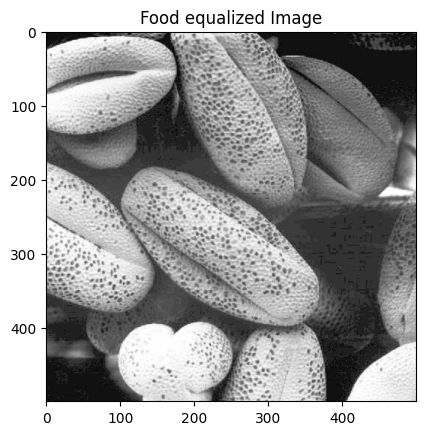

In [4]:
def histEqualization(inputImg):
    histogram = CalHist(inputImg)
    histogram = [histogram.get(i, 0) for i in range(256)]
    cumHist = np.cumsum(histogram) / np.sum(histogram)
    func = np.uint8(255 * cumHist)
    equalizedImg = func[inputImg]
    return equalizedImg, func



import time
start = time.time()
equalizedFoodImg, customHistEqualizationTransfunc = histEqualization(foodIm)
end = time.time()
print("histEqualization takes ", end - start, " seconds")


plt.imshow(equalizedFoodImg,cmap='gray')
plt.title('Food equalized Image')
plt.show()





# Problem 4

built in function to perform histogram equalization on a grayscale input image to achieve the maximum gray level of 256 and return the transform function. Display the running time of using the built in function to accomplish the task on the console.

Built in function takes 0.0010056495666503906 seconds


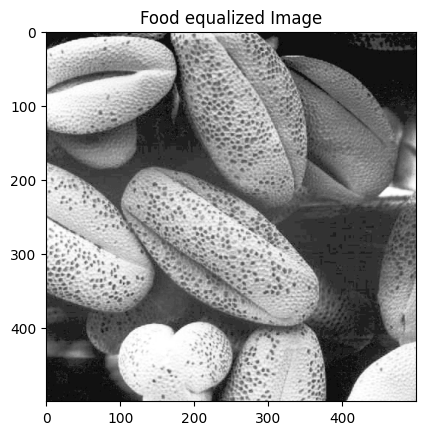

In [5]:
import time
start_time = time.time()
equalizedFoodImg = cv2.equalizeHist(foodIm)
print("Built in function takes %s seconds" % (time.time() - start_time))

plt.imshow(equalizedFoodImg,cmap='gray')
plt.title('Food equalized Image')
plt.show()



# Problem 5
Please carefully read the paper titled “Contrast Enhancement Using Brightness Preserving Bi-Histogram
Equalization” to understand the basic idea of Brightness Preserving Bi-Histogram Equalization (BBHE).
Implement a BBHE function to perform a contrast enhancement operation as proposed in the paper and
return the transform function, which is a vector of 256 elements with the first and last elements being the
newly transformed values for intensity 0 and 255, respectively. Display the running time of using the
BBHE function to accomplish the task on the console. Make sure to use comments to describe basic steps
or ideas of the technique.
Call the BBHE function to generate the enhanced image BBHEFoodIm of the original image foodIm.
Display the enhanced images generated in Problems 3, 4, and 5 side-by-side in Figure 3 with appropriate
titles.
Plot the transform functions obtained in Problems 3, 4, and 5 side-by-side in Figure 4 with appropriate
titles on both the x and y axes. If the built-in function does not return a transform function in Problem 4,
you plot the transform functions obtained in Problems 3 and 5 side-by-side in Figure 4 with appropriate
titles on both the x and y axes.
Compute and display the Peak Signal to Noise Ratio (PSNR) values to compare equalizedFoodIm
(obtained in Problem 3) with the original image foodIm and compare BBHEFoodIm (obtained in Problem
5) with the original image foodIm, respectively.


BBHE takes  0.1528642177581787  seconds


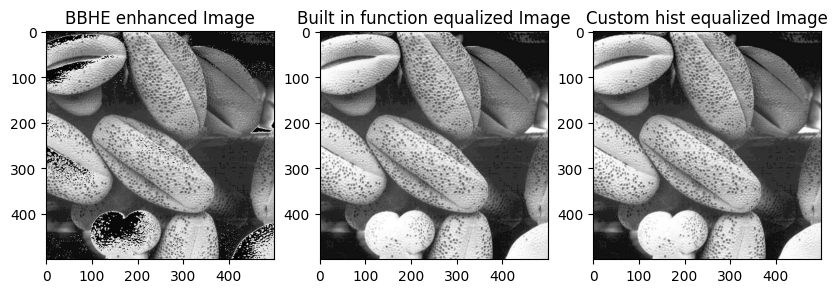

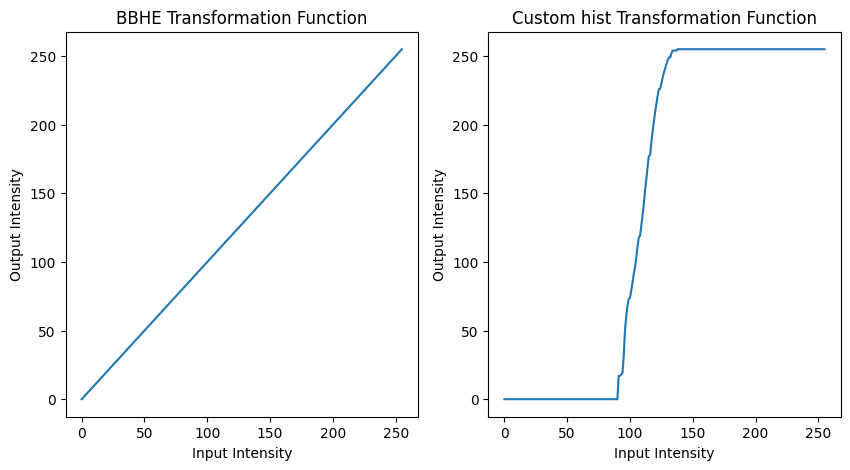

In [6]:
def BBHE(inputIm):
    # get the mean intensity so I can know where to separate the image into dark and light part
    # meanIntensity = np.mean(inputIm)
    # or use the a set threshold. I found that the set threshold of the middle of the 256 intensity looked the best visually
    threshold =128
    # threshold = int(meanIntensity)
    dark_part = inputIm.copy() 
    light_part = inputIm.copy()
    # separate dark and light part   
    dark_part[dark_part > threshold] = 0
    light_part[light_part <= threshold] = 0

    # perform histogram equalization on dark and light parts
    enhanced_dark_part, func_dark = histEqualization(dark_part)
    enhanced_light_part, func_light = histEqualization(light_part)

    # combine the enhanced dark and light parts together to get the final enhanced image
    enhancedIm = enhanced_dark_part + enhanced_light_part

    # combine the transformation functions of the dark and light parts together to get the final transformation function
    transFunc = np.arange(256, dtype=np.uint8) # create an array of 256 elements with the data type of uint8
    transFunc[func_dark] = func_dark # set the first half of the array to the transformation function of the dark part
    transFunc[func_light + threshold] = func_light + threshold # set the second half of the array to the transformation function of the light part

    return enhancedIm, transFunc



start_time = time.time()
enhancedIm, BBHETransformFun = BBHE(foodIm)
end_time = time.time()
print("BBHE takes ", end_time - start_time, " seconds")


custom_hist_equalizedFoodImg = histEqualization(foodIm)[0]
# display the enhancedIm and the equalizedFoodImg and the custom_hist_equalizedFoodImg side by side
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(enhancedIm,cmap='gray')
ax1.set_title('BBHE enhanced Image')
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(equalizedFoodImg,cmap='gray')
ax2.set_title('Built in function equalized Image')
ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(custom_hist_equalizedFoodImg,cmap='gray')
ax3.set_title('Custom hist equalized Image')
plt.show()

# plot the BBHETTransformFun and the customHistEqualizationTransfunc side by side
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(BBHETransformFun)
ax1.set_title('BBHE Transformation Function')
ax1.set_xlabel('Input Intensity')
ax1.set_ylabel('Output Intensity')
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(customHistEqualizationTransfunc)
ax2.set_title('Custom hist Transformation Function')
ax2.set_xlabel('Input Intensity')
ax2.set_ylabel('Output Intensity')
plt.show()

